In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Age Category Cleaning

In [3]:
matches_df = pd.read_csv('../data/raw/matches.csv')
players_df = pd.read_csv('../data/raw/players_profile.csv')

matches_df['TournamentEndDate'] = pd.to_datetime(matches_df['TournamentEndDate'])

In [4]:
matches_df

,MatchID,Side1Player1ID,Side2Player1ID,SetWinner,TournamentEndDate,prov,ageCategoryCode,circuit,grade,drawType,tournamentLevel
0,6049490b93b0e16dfdd100a1,FIN1436331,BEA1415950,FIN1436331,2016-01-01,LTA,Open,U,4,NaN,DIS
1,6049490b93b0e16dfdd100a1,FIN1436331,BEA1415950,BEA1415950,2016-01-01,LTA,Open,U,4,NaN,DIS
2,6049490b93b0e16dfdd1019d,HOL8785215,THI7164469,HOL8785215,2016-01-01,LTA,18 & Under,U,4,NaN,DIS
3,6049490b93b0e16dfdd1019d,HOL8785215,THI7164469,THI7164469,2016-01-01,LTA,18 & Under,U,4,NaN,DIS
4,6049491093b0e16dfdd11ee3,FIN1482294,THI7164469,FIN1482294,2016-01-01,LTA,16 & Under,U,4,NaN,DIS
...,...,...,...,...,...,...,...,...,...,...,...
8750451,611220c57cfd74f53a7a0771,HAN1188779,KRU1471013,HAN1188779,2021-07-31,ITF,OPEN,W,P700,Q,INT
8750452,611220c57cfd74f53a7a0771,HAN1188779,KRU1471013,KRU1471013,2021-07-31,ITF,OPEN,W,P700,Q,INT
8750453,611220c57cfd74fbf37a0773,BEK1221523,PER1219711,BEK1221523,2021-07-31,ITF,OPEN,W,P700,Q,INT
8750454,611220c57cfd74fbf37a0773,BEK1221523,PER1219711,BEK1221523,2021-07-31,ITF,OPEN,W,P700,Q,INT


In [5]:
# select matches before 2021-01-01
matches_df = matches_df[matches_df['TournamentEndDate'] < '2021-01-01']

In [6]:
# get the unique agecategorycode for each prov
matches_df.groupby(['prov'])['ageCategoryCode'].unique()

prov
IRL    [Open, u14, u12, u18, u16, u10, 12, 14, 18, 16...
ITF    [18U, O50, O55, O60, O65, O40, O45, nan, O35, ...
LTA    [Open, 18 & Under, 16 & Under, 14 & Under, 12 ...
USA    [10, 14, 12, 16, 18, U8, 8U, U14, U10, U12, 0-...
Name: ageCategoryCode, dtype: object

In [7]:
players_df

,PlayerID,NationalRating,birthDate,gender
0,ACH1423850,NaN,2002-12-30,F
1,ABR1486228,NaN,2002-12-08,F
2,ABR1020303,NaN,1945-11-02,M
3,ABU1403992,NaN,2000-01-30,F
4,ADA1252216,NaN,1996-03-18,M
...,...,...,...,...
390299,GRA1473416,NaN,2008-03-12,F
390300,CET9218420,NaN,1989-01-01,M
390301,SKL8813695,NaN,1978-04-24,M
390302,KOS5822987,NaN,1986-04-13,M


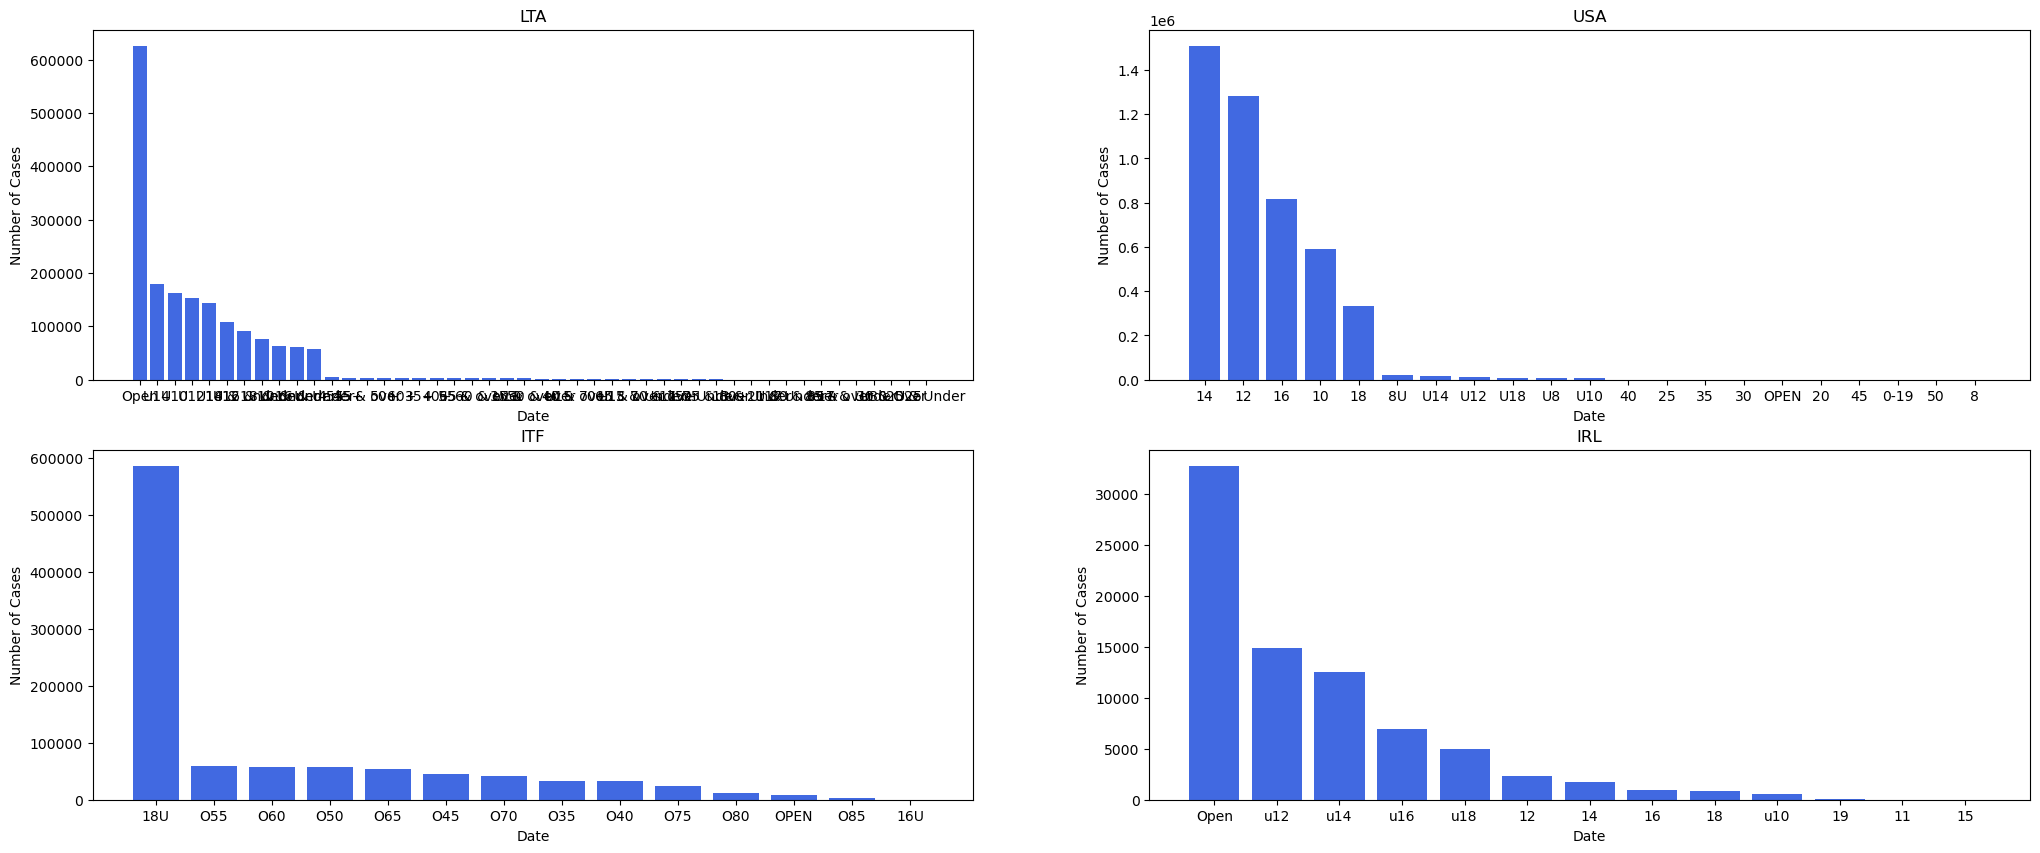

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(25, 10))

prov_list = matches_df['prov'].unique()
for i, prov in enumerate(prov_list):
    plot_df = matches_df[matches_df['prov'].isin([prov])].value_counts('ageCategoryCode')
    axs[i//2, i%2].bar(plot_df.index, plot_df.values, color='royalblue')
    axs[i//2, i%2].set_title(prov)
    axs[i//2, i%2].set_xlabel('Date')
    axs[i//2, i%2].set_ylabel('Number of Cases')

In [29]:
# replace 14&Under with U14
wrong_code = ['10 & Under', '12 & Under', '14 & Under', '16 & Under', '18 & Under', '8U', 'u12', 'u14', 'u16', 'u18', '18U', 'Open', '8', '10', '12', '14', '16', '18']
correct_code = ['U10', 'U12', 'U14', 'U16', 'U18', 'U8', 'U12', 'U14', 'U16', 'U18', 'U18', 'OPEN', 'U8', 'U10', 'U12', 'U14', 'U16', 'U18']

for i in range(len(wrong_code)):
    matches_df['ageCategoryCode'] = matches_df['ageCategoryCode'].replace(wrong_code[i], correct_code[i])


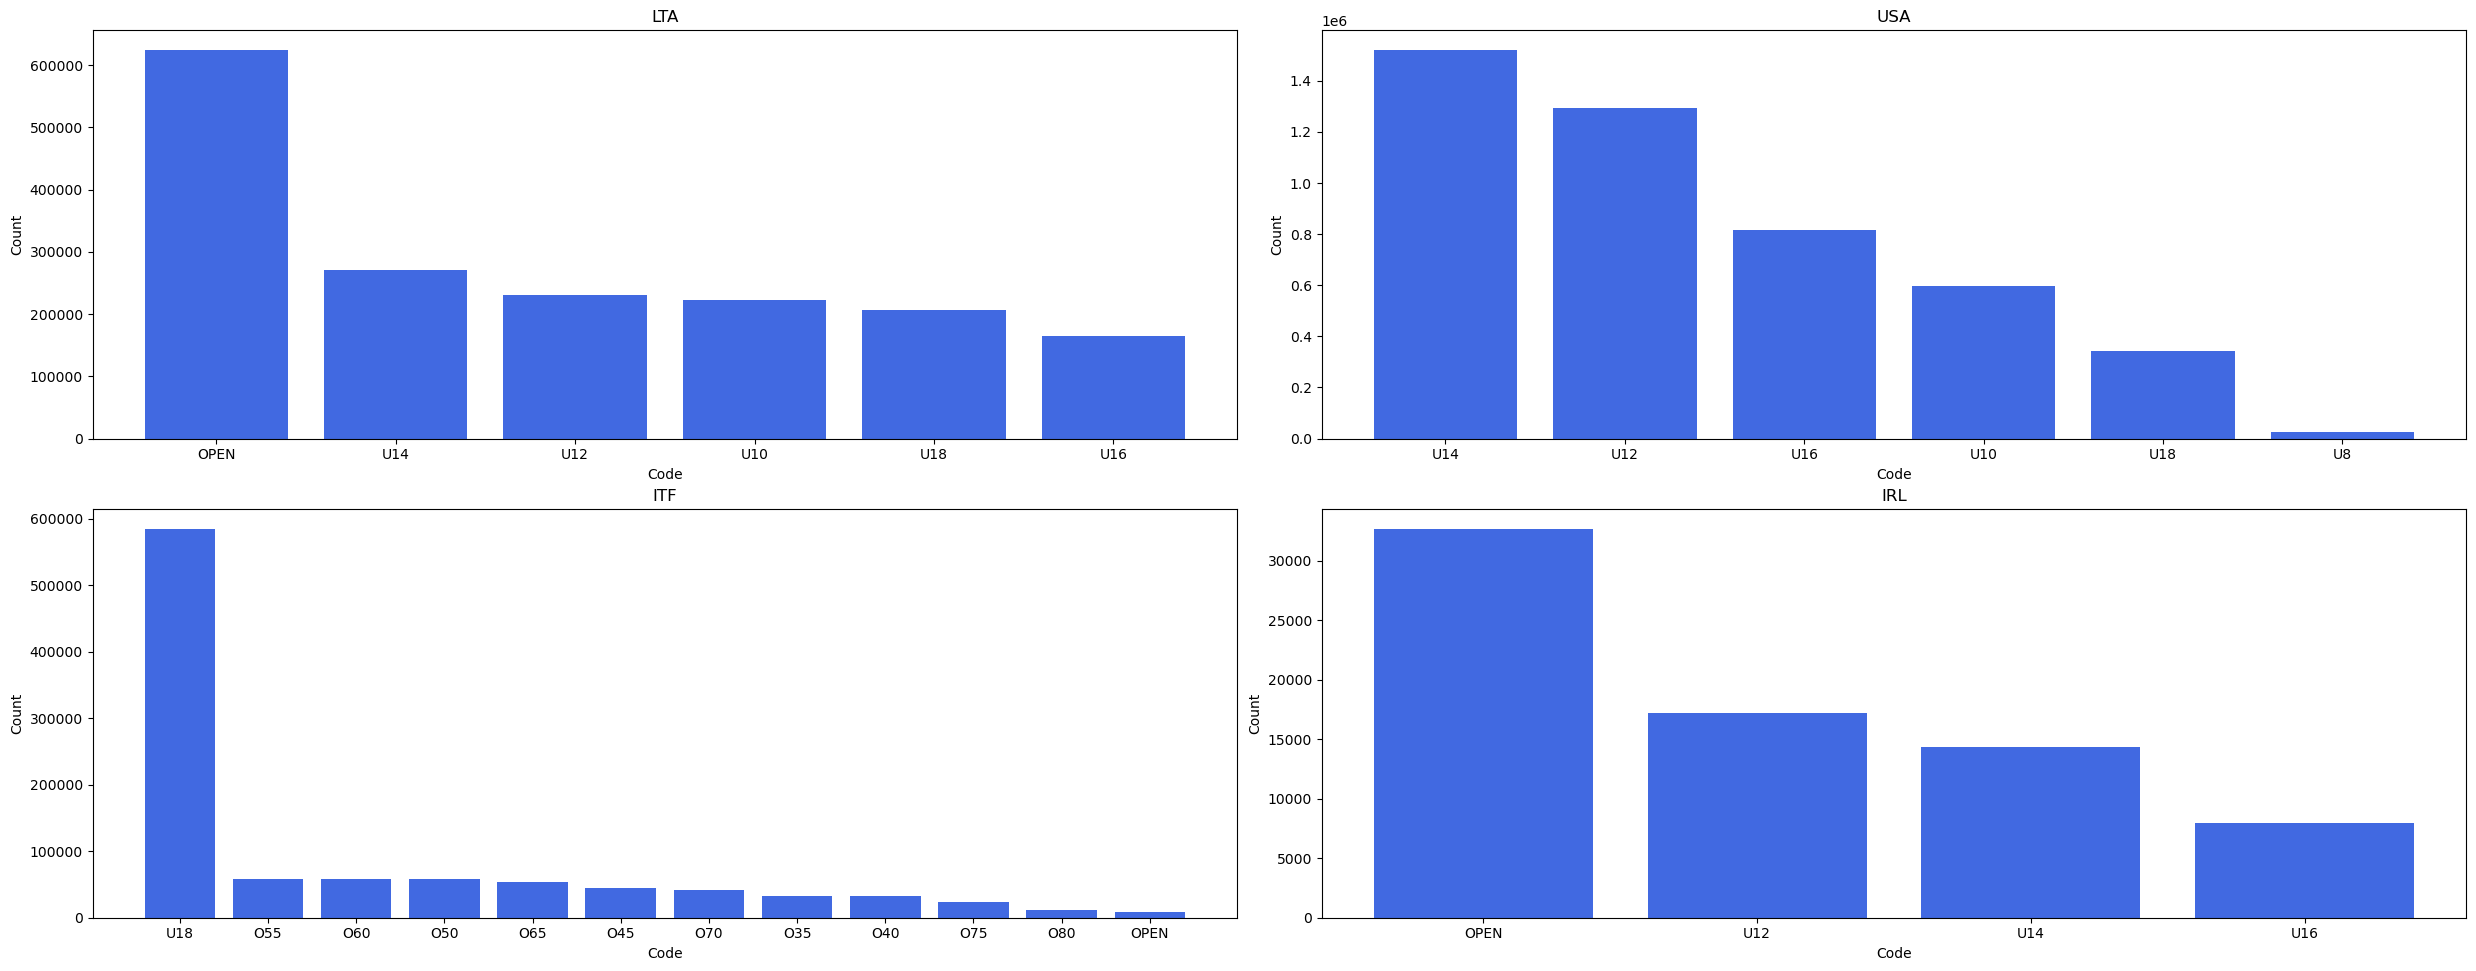

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(25, 10))
fig.tight_layout(pad=3.0)

code_list = []
for i, prov in enumerate(prov_list):
    plot_df = matches_df[matches_df['prov'].isin([prov])].value_counts('ageCategoryCode')
    plot_df = plot_df[plot_df > 5000]
    # record the code list
    code_list = code_list + plot_df.index.tolist()
    axs[i//2, i%2].bar(plot_df.index, plot_df.values, color='royalblue')
    axs[i//2, i%2].set_title(prov)
    axs[i//2, i%2].set_xlabel('Code')
    axs[i//2, i%2].set_ylabel('Count')

plt.savefig('../outputs/hist.png', dpi=300, bbox_inches='tight')

In [31]:
# remove matches that is not significantW
matches_df = matches_df[matches_df['ageCategoryCode'].isin(code_list)]

In [32]:
# number of matches in each year between 2016-2021 for each provine
# transfer the date into year only

df = matches_df.copy()
df['year'] = pd.DatetimeIndex(df['TournamentEndDate']).year

df.groupby(['year'])["prov"].value_counts()

year  prov
2016  USA      803075
      LTA      343807
      ITF      211136
2017  USA      932513
      LTA      376840
      ITF      222386
2018  USA     1070264
      LTA      437126
      ITF      231655
      IRL       27253
2019  USA     1152215
      LTA      456547
      ITF      257661
      IRL       30830
2020  USA      635160
      LTA      106552
      ITF       85184
      IRL       14864
Name: prov, dtype: int64

In [33]:
# save the cleaned data to csv file
matches_df.to_csv('../data/matches_cleaned.csv', index=False)

# Split the data into M & F group

In [34]:
matches_c = matches_df.copy()
matches_c = matches_c.iloc[:, 1:7]

In [35]:
matches_c

,Side1Player1ID,Side2Player1ID,SetWinner,TournamentEndDate,prov,ageCategoryCode
0,FIN1436331,BEA1415950,FIN1436331,2016-01-01,LTA,OPEN
1,FIN1436331,BEA1415950,BEA1415950,2016-01-01,LTA,OPEN
2,HOL8785215,THI7164469,HOL8785215,2016-01-01,LTA,U18
3,HOL8785215,THI7164469,THI7164469,2016-01-01,LTA,U18
4,FIN1482294,THI7164469,FIN1482294,2016-01-01,LTA,U16
...,...,...,...,...,...,...
8300643,WEI5455011,KOL3447596,WEI5455011,2020-12-31,USA,U16
8300644,DAU6756723,SCH8059056,DAU6756723,2020-12-31,USA,U16
8300645,DAU6756723,SCH8059056,DAU6756723,2020-12-31,USA,U16
8300646,BIN6647460,STE8960637,STE8960637,2020-12-31,USA,U16


In [36]:
matches_c.columns = ['Player1', 'Player2', 'Winner', 'EndDate', 'Prov', 'Code']

In [37]:
# choose only matches with recorded players
players_list = pd.concat([matches_c['Player1'], matches_c['Player2']]).unique()
players_record = players_df['PlayerID'].unique()
recorded_players = set(players_list).intersection(players_record)
unrecorded_players = set(players_list).difference(players_record)

In [38]:
# remove matches with unrecorded players
matches_c = matches_c[matches_c['Player1'].isin(recorded_players)]
matches_c = matches_c[matches_c['Player2'].isin(recorded_players)]

In [39]:
matches_c[matches_c['Prov'] != 'IRL']

,Player1,Player2,Winner,EndDate,Prov,Code
0,FIN1436331,BEA1415950,FIN1436331,2016-01-01,LTA,OPEN
1,FIN1436331,BEA1415950,BEA1415950,2016-01-01,LTA,OPEN
2,HOL8785215,THI7164469,HOL8785215,2016-01-01,LTA,U18
3,HOL8785215,THI7164469,THI7164469,2016-01-01,LTA,U18
4,FIN1482294,THI7164469,FIN1482294,2016-01-01,LTA,U16
...,...,...,...,...,...,...
8300643,WEI5455011,KOL3447596,WEI5455011,2020-12-31,USA,U16
8300644,DAU6756723,SCH8059056,DAU6756723,2020-12-31,USA,U16
8300645,DAU6756723,SCH8059056,DAU6756723,2020-12-31,USA,U16
8300646,BIN6647460,STE8960637,STE8960637,2020-12-31,USA,U16


In [40]:
# remove matches with mixed gender matches
mapping = dict(zip(players_df["PlayerID"], players_df["gender"]))
matches_c['Gender'] = matches_c['Player1'].map(mapping)
matches_c['Gender2'] = matches_c['Player2'].map(mapping)

matches_c = matches_c[matches_c['Gender'] == matches_c['Gender2']]
matches_c = matches_c.drop(['Gender2'], axis=1)

In [41]:
matches_c

,Player1,Player2,Winner,EndDate,Prov,Code,Gender
0,FIN1436331,BEA1415950,FIN1436331,2016-01-01,LTA,OPEN,F
1,FIN1436331,BEA1415950,BEA1415950,2016-01-01,LTA,OPEN,F
2,HOL8785215,THI7164469,HOL8785215,2016-01-01,LTA,U18,M
3,HOL8785215,THI7164469,THI7164469,2016-01-01,LTA,U18,M
4,FIN1482294,THI7164469,FIN1482294,2016-01-01,LTA,U16,M
...,...,...,...,...,...,...,...
8300643,WEI5455011,KOL3447596,WEI5455011,2020-12-31,USA,U16,F
8300644,DAU6756723,SCH8059056,DAU6756723,2020-12-31,USA,U16,F
8300645,DAU6756723,SCH8059056,DAU6756723,2020-12-31,USA,U16,F
8300646,BIN6647460,STE8960637,STE8960637,2020-12-31,USA,U16,F


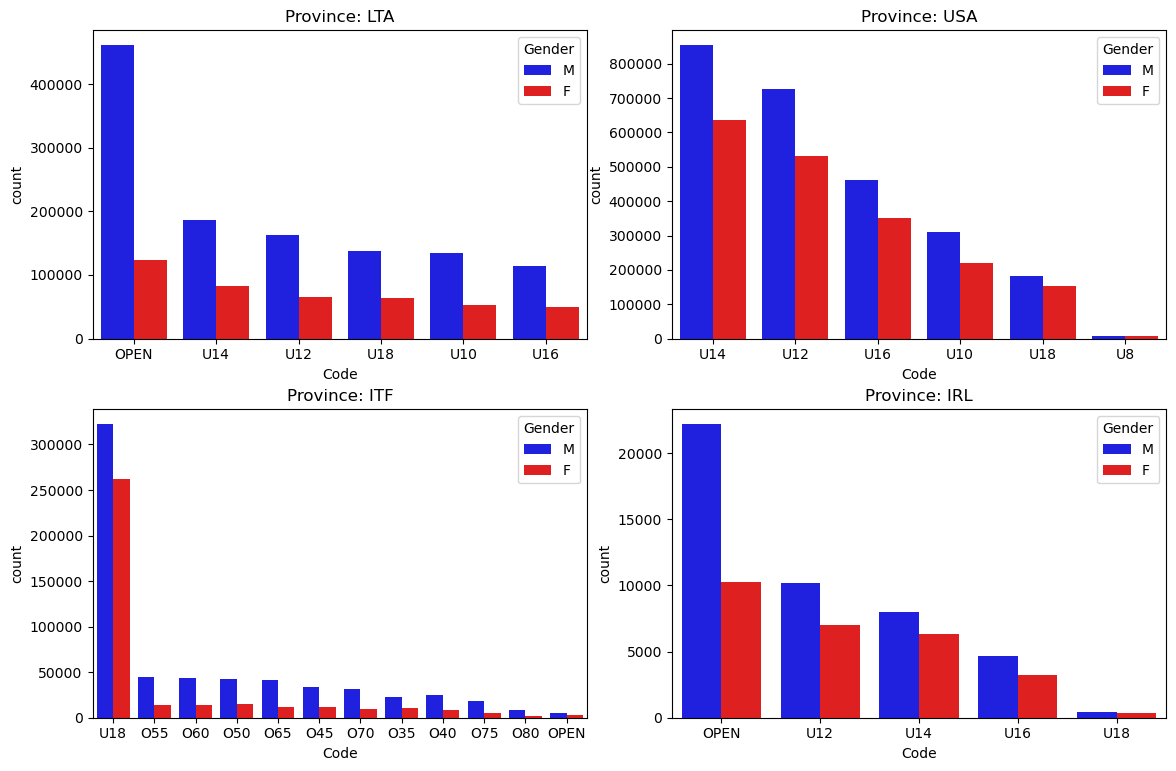

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

df = matches_c
provinces = df['Prov'].unique()  # Get the unique provinces
gender_palette = {'M': 'blue', 'F': 'red'} 

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.tight_layout(pad=3)
axes = axes.ravel()  # Flattens the 2D array to 1D for easy indexing

for i, prov in enumerate(provinces):
    ax = axes[i]
    df_prov = df[df['Prov'] == prov]
    if prov == 'USA':
        # remove OPEN for USA
        df_prov = df_prov[df_prov['Code'] != 'OPEN']
    sns.countplot(x='Code', hue='Gender', data=df_prov, ax=ax, 
                  palette=gender_palette, order=df_prov['Code'].value_counts().index, hue_order=['M', 'F'])

    ax.set_title(f'Province: {prov}')


plt.savefig('../outputs/hist2.png', dpi=300, bbox_inches='tight')

In [46]:
matches_M = matches_c[matches_c["Gender"] == "M"]
matches_F = matches_c[matches_c["Gender"] == "F"]

In [47]:
matches_M

,Player1,Player2,Winner,EndDate,Prov,Code,Gender
2,HOL8785215,THI7164469,HOL8785215,2016-01-01,LTA,U18,M
3,HOL8785215,THI7164469,THI7164469,2016-01-01,LTA,U18,M
4,FIN1482294,THI7164469,FIN1482294,2016-01-01,LTA,U16,M
5,FIN1482294,THI7164469,THI7164469,2016-01-01,LTA,U16,M
6,MIL1387542,PRI9504128,MIL1387542,2016-01-01,LTA,U18,M
...,...,...,...,...,...,...,...
8300629,HAR3169912,LOE7248371,HAR3169912,2020-12-31,USA,U14,M
8300630,SVE9545458,PRE2539815,SVE9545458,2020-12-31,USA,U12,M
8300631,SVE9545458,PRE2539815,SVE9545458,2020-12-31,USA,U12,M
8300632,SUN9855813,NGU5851920,NGU5851920,2020-12-31,USA,U12,M


In [48]:
matches_F

,Player1,Player2,Winner,EndDate,Prov,Code,Gender
0,FIN1436331,BEA1415950,FIN1436331,2016-01-01,LTA,OPEN,F
1,FIN1436331,BEA1415950,BEA1415950,2016-01-01,LTA,OPEN,F
11,TOD6751016,LEJ1426023,TOD6751016,2016-01-01,LTA,U12,F
12,TOD6751016,LEJ1426023,TOD6751016,2016-01-01,LTA,U12,F
13,TOD6751016,LEJ1426023,LEJ1426023,2016-01-01,LTA,U12,F
...,...,...,...,...,...,...,...
8300643,WEI5455011,KOL3447596,WEI5455011,2020-12-31,USA,U16,F
8300644,DAU6756723,SCH8059056,DAU6756723,2020-12-31,USA,U16,F
8300645,DAU6756723,SCH8059056,DAU6756723,2020-12-31,USA,U16,F
8300646,BIN6647460,STE8960637,STE8960637,2020-12-31,USA,U16,F


In [52]:
# save the data to csv file
matches_M.to_csv('../data/cleaned/matches_M.csv', index=False)
matches_F.to_csv('../data/cleaned/matches_F.csv', index=False)